# Modelo de dos pilotes: cimentación sobre un deposito de suelo estratificado

**Integrantes:**
- Javier Everardo Quintero Jaramillo
- Sebastian Cañas Jimenez
- Oscar Rincón Cardeño

Para las propiedades de los materiales dadas en el notebook y para dos pilotes:

- Proponer la máxima combinación de cargas P-M-V que pueda ser equilibrado por el suelo. Para determinar el valor de la combinación use el concepto de magnitud vectorial en un espacio P-M-V (el problema tiene multiples soluciones).
- Para la combinación propuesta graficar la configuración deformada de la cimentación.
- Para el sistema propuesto dibujar el diagrama de cuerpo libre de la cimentación.
- Llevar la combinación de cargas propuestas a valores que produzcan la falla inminente del depósito de suelo de manera que se rompa el equilibrio.
   
A continuación se importan las librerías que se utilizan en este notebook:

In [1]:
# Esta línea asegura que los gráficos que crees se muestren en el cuaderno sin necesidad de llamar a plt.show() cada vez.
%matplotlib inline

# Importando las bibliotecas necesarias
# NumPy es una biblioteca para el lenguaje de programación Python, que añade soporte para grandes matrices y arreglos multidimensionales, 
# junto con una gran colección de funciones matemáticas de alto nivel para operar en estos arreglos.
import numpy as np

# Matplotlib es una biblioteca de gráficos para el lenguaje de programación Python y su extensión de matemáticas numéricas NumPy. 
# Proporciona una API orientada a objetos para incrustar gráficos en aplicaciones usando kits de herramientas GUI de propósito general como Tkinter, wxPython, Qt, o GTK.
import matplotlib.pyplot as plt

# solidspy.postprocesor es un módulo de la biblioteca SolidSpy, que es un análisis de elementos finitos simple en Python.
# Este módulo contiene rutinas para el post-procesamiento de los resultados.
import solidspy.postprocesor as pos

# aux_functions es un módulo definido por el usuario. Parece contener rutinas externas creadas para la automatización de tareas.
import aux_functions as aux

# pandas es una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y análisis de datos. 
# En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series de tiempo.
import pandas as pd

from IPython.display import display, Image

import warnings
warnings.filterwarnings('ignore')

Aquí está el código de la función modelos que selecciona el modelo a utilizar basándose en el parámetro id_model y devuelve los parámetros correspondientes:

In [69]:
def modelos(P1, P2, V1, V2, id_model):
    """
    Esta función selecciona el modelo a utilizar basándose en el parámetro id_model y devuelve los parámetros correspondientes.
    
    Parámetros:
    P1, P2, V1, V2: Parámetros de carga
    id_model: Identificador del modelo a utilizar (0 para zapata, 1 para 1 pilote, cualquier otro valor para 2 pilotes)
    
    Devuelve:
    nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles: Parámetros correspondientes al modelo seleccionado
    """
       
    # Selección del modelo
    if id_model == 0:  # Condición para el modelo zapata
        nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = aux.zapata(P1, P2, V1, V2)
    elif id_model == 1:  # Condición para el modelo 1 pilote
        nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = aux.pilote_1(P1, P2, V1, V2)
    else:  # Condición para el modelo 2 pilotes
        nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = aux.pilote_2(P1, P2, V1, V2)
    
    # Devuelve los parámetros
    return nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles

En la siguiente celda se propone el modelo 2, correspondiente a 2 pilotes.

In [70]:
# Elige el modelo (0: Zapata, 1: 1 pilote, 2: 2 pilotes)
id_model = 2

Esta celda calcula y muestra las resistencias a la compresión de diferentes estratos de suelo basándose en su profundidad, ángulo de fricción interna y peso unitario.

In [71]:
# Define la profundidad (z) en metros
z = [2.0, 5.0, 8.0, 12.0, 22]

# Define el ángulo de fricción interna (phi) en grados
phi = [23.0, 28.0, 29.0, 30.0, 30.0]

# Define el peso unitario (gamma) en kN/m^3
gamma = [1.6, 1.7, 1.85, 1.80, 1.90]

# Llama a la función properties del módulo aux para calcular las propiedades del suelo
# Parece que toma como entradas la profundidad, el ángulo de fricción interna y el peso unitario
Sc = aux.properties(z, phi, gamma)

# Convierte las propiedades del suelo a un DataFrame de pandas para una visualización y manipulación más fácil
soil_properties_df = pd.DataFrame(Sc)

# Cambia el índice para empezar desde 1
soil_properties_df.index = soil_properties_df.index + 1

# Redondea los valores a dos decimales
soil_properties_df = soil_properties_df.round(2)

# Asigna un nuevo nombre a la columna
soil_properties_df.columns = ['Resistencia']

# Muestra el DataFrame
print('Resistencias a la compresión de cada estrato:')
print(soil_properties_df.to_string())

Resistencias a la compresión de cada estrato:
   Resistencia
1         9.58
2        59.54
3       122.88
4       212.57
5       411.37


- Similarmente las resistencias al corte de los diferentes estratos se especifica en la siguiente tabla:

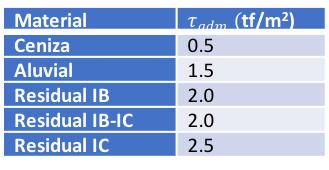

In [2]:
display(Image(filename='img/fuste.png'))

- Se busca la máxima combinación de cargas P-M-V encontrada que pueda ser equilibrada por el suelo de acuerdo a las dos tablas presentadas arriba (resistencia a la compresión y resistencia al corte).

- Para esto se propone hallar la combinación de P - V -M verificando el equilibrio del sistema para intervalos de 0.5 tf ó tf-m hasta 2.0 tf ó tf-m.

- Luego se calcula la magnitud del vector resultante.

- Abajo se anotan las combinaciones probadas y la causa de falla.

<center>

| P (tf)| V (tf)| M (tf*m)| Falla |
|---|---|---|---|
| 0.5 | 0.0 | 0.0 | No |
| 0.0 | 0.5 | 0.0 | No |
| 0.0 | 0.0 | 0.5 | No |
| 1.0 | 0.0 | 0.0 | No |
| 0.0 | 1.0 | 0.0 | No |
| 0.0 | 0.0 | 1.0 | Sí - $\tau_{max} >$ recistencia al corte de ceniza |
| 1.5 | 0.0 | 0.0 | No |
| 0.0 | 1.5 | 0.0 | No |
| 2.0 | 0.0 | 0.0 | Sí - $\tau_{max} >$ recistencia al corte de ceniza |
| 0.0 | 2.0 | 0.0 | Sí - $\tau_{max} >$ recistencia al corte de ceniza |
| 1.5 | 0.5 | 0.0 | Sí - $\tau_{max} >$ recistencia al corte de ceniza |
| 0.5 | 1.5 | 0.0 | Sí - $\tau_{max} >$ recistencia al corte de ceniza |
</center>

- La combinación máxima encontrada fue de: 1.5 tf - 0.0 tf - 0.0 tf-m ó 0.0 tf - 1.5 tf - 0.0 tf-m (P-M-V).

In [72]:
# Define las cargas en tf (tonelada-fuerza) y tf*m (tonelada-fuerza metro)
P = 1.5  # tf
V = 0.0  # tf
M = 0.0  # tf*m

# Calcula la magnitud del vector
magnitud = np.sqrt(P**2 + M**2 + V**2)

# Imprime el resultado
print("La magnitud del vector es:", magnitud, "tf")

La magnitud del vector es: 1.5 tf


Este código calcula e imprime las cargas resultantes en cada punto de aplicación en toneladas-fuerza (tf).

In [73]:
# Calcula las cargas resultantes en cada punto de aplicación en tf
P1 = -2 * M + P / 2 # tf
P2 = 2 * M + P / 2 # tf
V1 = V / 2 # tf
V2 = V / 2 # tf

# Imprime las cargas resultantes
print(f"P1 = {P1} tf")
print(f"P2 = {P2} tf")
print(f"V1 = {V1} tf")
print(f"V2 = {V2} tf")

P1 = 0.75 tf
P2 = 0.75 tf
V1 = 0.0 tf
V2 = 0.0 tf


Se ejecuta el modelo y se obtienen los parámetros

In [74]:
nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = modelos(P1, P2, V1, V2, id_model)

A continuación, para la combinación propuesta, se grafica la configuración deformada de la cimentación.

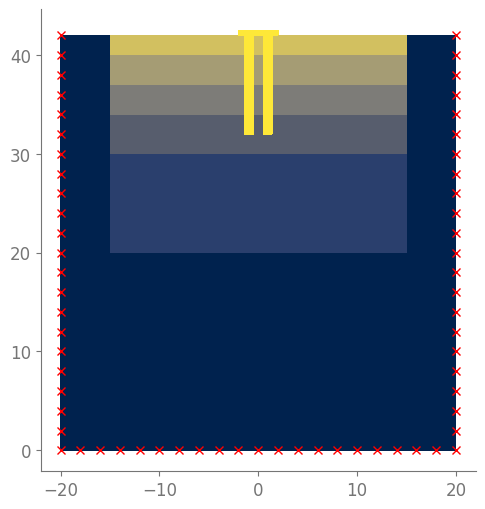

In [75]:
aux.deformacionFill(nodes , elements , UC , factor = 1.0 , cmap='cividis')

A continuación se calculan las tensiones principales y cortantes máximos que serán comparadas con los valores de resistencia a compresión y corte.

In [76]:
sig_1, sig_2, dir_1, dir_2 = pos.principal_dirs(S_nodes)
TAO = (np.abs(sig_1 - sig_2))/2

Incialmente se visualiza  la tensión principal máxima en el estrato 1 y en los dos pilotes.

(36.0, 45.0)

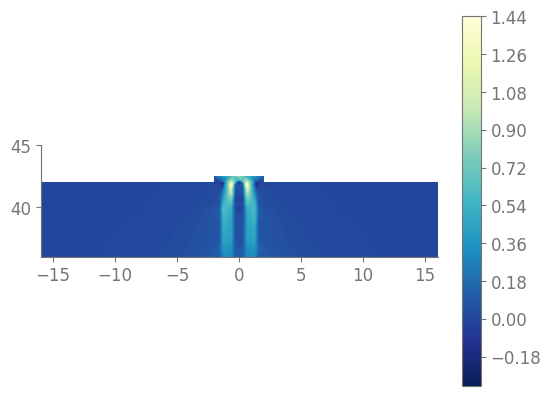

In [77]:
els = np.vstack((
    eles[1],  # Semi-espacio
    eles[2],  # Estrato 5
    eles[3],  # Estrato 4
    eles[4],  # Estrato 3
    eles[5],  # Estrato 2
    eles[6],  # Estrato 1
    eles[7],  # Semi-espacio
))
pos.plot_node_field(sig_1, nodes, els, plt_type="contourf", levels=100)
plt.xlim([-16,16])
plt.ylim([36,45]) 

Se resaltan las zonas que superan el valor de referencia (resistencia a la compresión del primer estrato) color  púrpura oscuro. Se verifica que la combinación elegida no supera el valor de referencia en el estrato 1.

(36.0, 45.0)

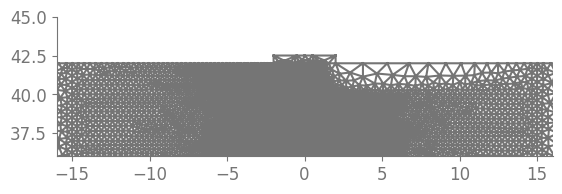

In [78]:
els = np.vstack((
    eles[1],  # Semi-espacio
    eles[2],  # Estrato 5
    eles[3],  # Estrato 4
    eles[4],  # Estrato 3
    eles[5],  # Estrato 2
    eles[6],  # Estrato 1
    eles[7],  # Semi-espacio
)) 
ref_val= -9.58
aux.filtered(nodes,els , sig_1, ref_val)
plt.xlim([-16,16])
plt.ylim([36,45])  

De igual forma se verifica que los valores obtenidos para las cargas elegidas no superan los valores de referencia de los demas estratos que son mayores al del estrato 1. 

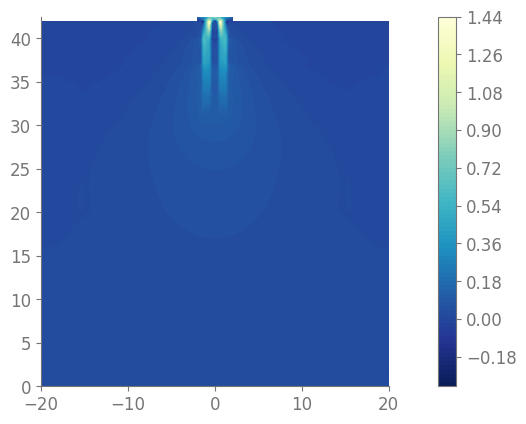

In [79]:
pos.plot_node_field(sig_1, nodes, els, plt_type="contourf", levels=100)

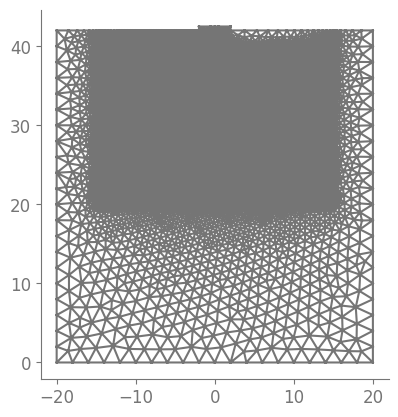

In [80]:
aux.filtered(nodes,els , sig_1, ref_val)

También se visualiza la tensión cortante máxima en el estrato 1 y en los dos pilotes.

(36.0, 45.0)

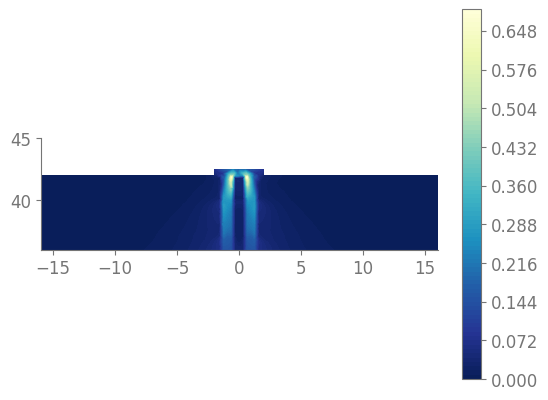

In [81]:
pos.plot_node_field(TAO, nodes, els, plt_type="contourf", levels=100)
plt.xlim([-16,16])
plt.ylim([36,45]) 

Se resaltan las zonas que superan el valor de referencia (resistencia a la tensión cortante del primer estrato) color  púrpura oscuro. Se verifica que la combinación elegida no supera el valor de referencia en el estrato 1.

(36.0, 45.0)

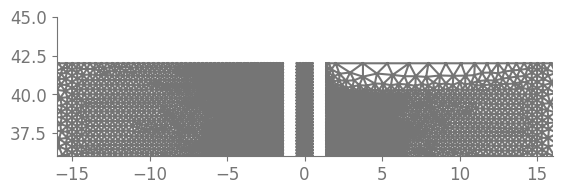

In [82]:
els = np.vstack((
    eles[1],  # Semi-espacio
    eles[2],  # Estrato 5
    eles[3],  # Estrato 4
    eles[4],  # Estrato 3
    eles[5],  # Estrato 2
    eles[6],  # Estrato 1
    #eles[7],  # Semi-espacio
)) 
ref_val= 0.5
aux.filtered(nodes,els , TAO, ref_val)
plt.xlim([-16,16])
plt.ylim([36,45]) 

y se verefica de igual forma para los demas estratos.

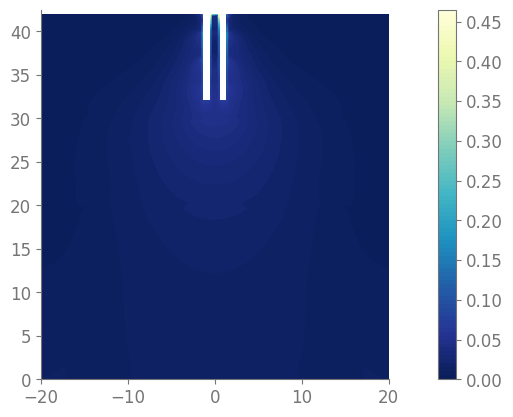

In [83]:
 
pos.plot_node_field(TAO, nodes, els, plt_type="contourf", levels=100)

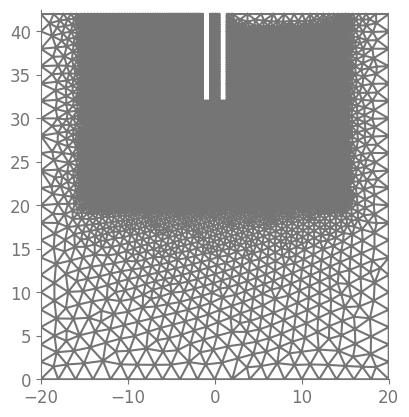

In [84]:
aux.filtered(nodes,els , TAO, ref_val)

A continuación se presenta un diagrama de cuerpo libre de los pilotes.

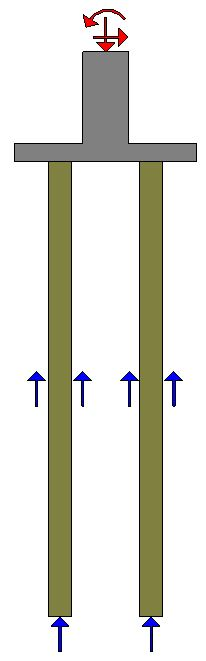

In [3]:
display(Image(filename='img/diagrama_pilotes.png'))

Ahora se repite el procedimiento con valores que producen la falla del deposito de suelo al romper el equilibrio del sistema. Se observa como el color purpura alcanza la zona del estrato 1 para la tensión de corte máxima.
 
Al evaluar el sistema de cimentación con una carga normal de 15 tonf, y al aplicar el filtro de superación del esfuerzo con un valor de 0.5 tonf/m2 se puede evidenciar la falla del primer estrato. Al ver esto se decide subir el valor del filtro a 2.5tonf/m2 que es el estrato más lejano que alcanza a tocar la cimentación y de esta manera se evidencia que soporta sin problemas la carga.
 
Se somete entonces a cargas de momento, que son el tipo de carga con mayor criticidad que se pudo evidenciar en todo el ejercicio. Se inicia con un momento de 200 tonf*m, a partir de este resultado se evidencia una falla completa de la simentación. Se reduce la carga de momento a  100 tonf*m donde también, a partir del filtro con un valor de 2.5 tonf/m2, se puede verificar que hasta el ultimo estrato falla.

Se reduce el momento hasta 18 tonf*m donde se puede deducir, por la gráfica generada por solidspy, que es la carga máxima que puede soportar este sistema de cimentación.

La magnitud del vector es: 18.0 tf
P1 = -36.0 tf
P2 = 36.0 tf
V1 = 0.0 tf
V2 = 0.0 tf


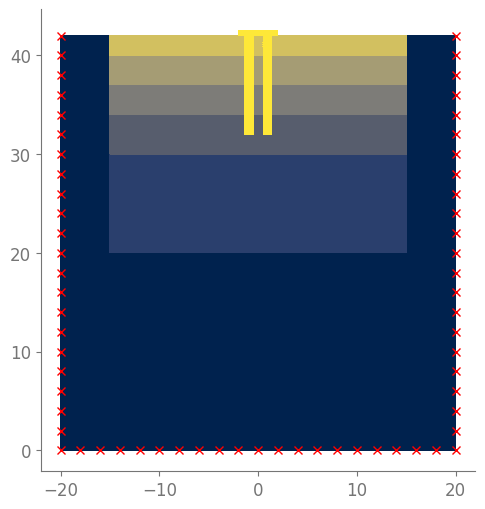

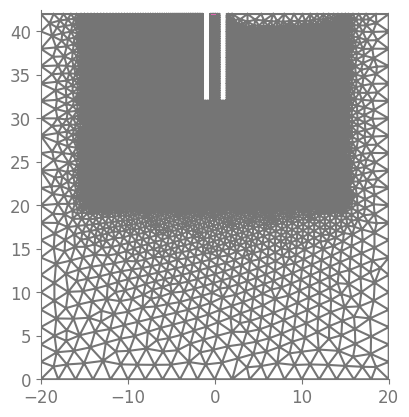

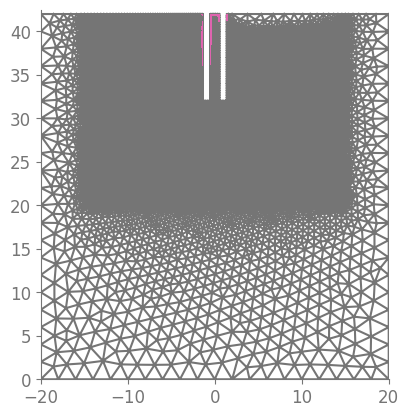

In [85]:
#factor de reescalamiento de las cargas
f_0 = 18

els = np.vstack((
    eles[1],  # Semi-espacio
    eles[2],  # Estrato 5
    eles[3],  # Estrato 4
    eles[4],  # Estrato 3
    eles[5],  # Estrato 2
    eles[6],  # Estrato 1
    #eles[7],  # Semi-espacio
)) 

# Define las cargas en tf (tonelada-fuerza) y tf*m (tonelada-fuerza metro)
P = f_0*0.0  # tf
V = f_0*0.0  # tf
M = f_0*1.0  # tf*m

# Calcula la magnitud del vector
magnitud = np.sqrt(P**2 + M**2 + V**2)

# Imprime el resultado
print("La magnitud del vector es:", magnitud, "tf")


# Calcula las cargas resultantes en cada punto de aplicación en tf
P1 = -2 * M + P / 2 # tf
P2 = 2 * M + P / 2 # tf
V1 = V / 2 # tf
V2 = V / 2 # tf

# Imprime las cargas resultantes
print(f"P1 = {P1} tf")
print(f"P2 = {P2} tf")
print(f"V1 = {V1} tf")
print(f"V2 = {V2} tf")

nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = modelos(P1, P2, V1, V2, id_model)

sig_1, sig_2, dir_1, dir_2 = pos.principal_dirs(S_nodes)
TAO = (np.abs(sig_1 - sig_2))/2

aux.deformacionFill(nodes , elements , UC , factor = 1.0 , cmap='cividis')
ref_val=-9.58
aux.filtered(nodes,els , sig_1, ref_val)
ref_val=2.50
aux.filtered(nodes,els , TAO, ref_val)